<a href="https://colab.research.google.com/github/SproutCoder/q4.0/blob/main/klassifizerung_ausfallart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Entscheidungsbaum: Ausfallarten klassifizieren für Maschinenwartung

In diesem Colab-Notebook geht es darum, ein Entscheidungsbaum-Modell zu trainieren, um herauszufinden, welche Art von Ausfall bei einer Maschine während des Betriebs auftreten kann, indem Daten von Sensoren verwendet werden. Wenn man weiß, welche Art von Ausfall am wahrscheinlichsten ist, kann man präventive Wartungsmaßnahmen ergreifen, um diesen Ausfall zu verhindern oder zu reduzieren. Das Modell kann helfen, die Wartung effizienter zu gestalten und möglicherweise auch die Betriebszeit der Maschine zu verlängern. Das Notebook erklärt Schritt für Schritt, wie man den Datensatz kennenlernt, ihn für das Training des Computerprogramms vorbereitet und wie man das trainierte Programm testet. Schließlich wird mit Beispieldaten klassifiziert, welche Art von Ausfall bei einer Maschine vorliegt.

zuletzt geprüft: 11.05.2023 CK

### Prozessschritte Modellentwicklung
1. Daten einlesen
2. Daten erkunden
3. Daten vorbereiten
4. Modelle bilden
5. Modelle validieren
6. Modell testen

## 0. Bibliotheken importieren

Bibliotheken stellen vorgefertigten Code bereit, mit dem Ihr bestimmte Aufgaben einfacher und schneller erledigen könnt. Für Maschine Learning Projekte gibt es viele Bibliotheken in Python, wie NumPy, Pandas, Scikit-learn, TensorFlow und Keras. Diese Bibliotheken bieten viele nützliche Funktionen und Werkzeuge für das maschinelle Lernen, wie z. B. die Aufbereitung von Daten, die Visualisierung von Daten, und die Auswertung von Modellen.

Das Verwendend dieser Bibliotheken kann Euch viel Zeit und Mühe sparen, da Ihr nicht alles von Grund auf neu schreiben müsst. Ihr könnte die Bibliothek einfach importieren und ihre vorgesfertigten Funktionen verwenden, um das benötigte zu erledigen.

In [ ]:
# Importiere benötigte Bibliotheken
import numpy as np # https://numpy.org/doc/stable/
import pandas as pd # https://pandas.pydata.org/docs/
import seaborn as sns # https://seaborn.pydata.org/tutorial.html
import matplotlib.pyplot as plt # https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

## 1. Daten einlesen

Wenn wir einem Computer beibringen wollen, wie er ein Problem lösen soll, müssen wir ihm zunächst einige Beispiele geben, anhand derer er lernen kann. Diese Beispiele werden "Daten" genannt. Der Computer schaut sich die Daten an und versucht, Muster oder Regeln zu finden, die ihm helfen, ähnliche Probleme in der Zukunft zu lösen.

Bevor wir also damit beginnen können, dem Computer etwas beizubringen, müssen wir die richtigen Daten für ihn finden und in das Computer Programm laden, so dass später daraus gelernt werden kann.

### 1.1 CSV-Datei in Colab ablegen

 Wir legen nun die Datei `predictive_maintenance.csv` in unserer Colab-Umgebung ab. Ihr könnt die Datei [hier](https://drive.google.com/file/d/1xkZRQvCpx1sQ6GBs7VkrRclap4R1qZL1/view?usp=share_link) runterladen.
Als nächstes klickt auf der rechten Seite auf Ordner-das Symbol:

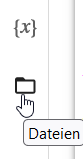

Nach dem Anklicken, finden wir die Möglichkeit unsere eigene Datei dort hochzuladen:

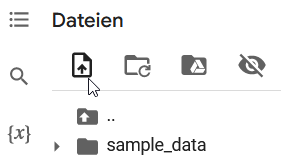


### 1.2.a Daten einlesen - Übung

Mit dem Befehl ```df=pd.read_csv("/Ordnername/Dateiname.csv") ```lesen wir eine durch Komma getrennte csv-Datei ein und speichern sie mit dem Namen 'df' ab. Der Name 'df' ist Konvention und steht für "DataFrame". DataFrames sind Tabellen, die auf Pandas zugeschnitten sind.

Der Dateipfad zu unserer Datei in Colab lautet `/content/predictive_maintenance.csv`

In [ ]:
#Daten einlesen
# DEIN CODE HIER

In [ ]:
#@title  1.2.b Lösung ein/ausklappen
#Daten einlesen
df=pd.read_csv("/content/predictive_maintenance.csv")

## 2. Daten erkunden
Beim maschinellen Lernen ist es wichtig, die Daten zu erkunden und kennenzulernen, um Muster, Trends und Beziehungen zu verstehen. Das hilft bei der Entscheidung, welcher Algorithmus für das Lernen verwendet werden soll und wie die Daten vorbereitet werden müssen. Ein Beispiel wäre, dass man für die Vorhersage, ob eine Schülerin einen Test besteht oder nicht, herausfindet, dass eine hohe Anwesenheit der Schülerin zu guten Noten führt. Diese Erkenntnis kann helfen, die Genauigkeit des Modells zu verbessern, indem die Anwesenheitsdaten in das Modell einbezogen werden. Im Entscheidungsbaummodell, das in diesem Beispiel erstellt wird, werden alle Merkmale verwendet, da die Anzahl der Merkmale üebrschaubar ist.

### 2.1.a Stichprobe anzeigen lassen - Übung

Verschaffen wir uns Mal einen Überblick über die importierte Tabelle! Mit dem Befehl ```df.sample(6) ``` können wir eine zufällige Stichprobe aus unserem Datensatz ausgeben lassen, die sechs Elemente enthält.

Weitere Informationen zum Befehl [hier](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

In [ ]:
# gib eine zufällige Stichprobe aus der Tabelle 'df' aus
#DEIN CODE HIER

In [ ]:
#@title  2.1.b Lösung ein/ausklappen
# gib eine zufällige Stichprobe mit sechs Elementen aus
df.sample(6) #entnimmt sechs zufällige Stichproben

### 2.1.c Beschreibung des Datensatzes

Der vorliegende Datensatz besteht aus 10 000 Datenpunkten, die als Zeilen mit 14 Merkmalen in Spalten gespeichert sind

* UID: eindeutiger Bezeichner im Bereich von 1 bis 10000
* productID: bestehend aus den Buchstaben L, M oder H für niedrige/low , mittlere/mediumund hohe/high Produktqualitätsvarianten und einer variantenspezifischen Seriennummer
* Lufttemperatur [K]
* Prozesstemperatur [K]
* Drehzahl [U/min]
* Drehmoment [Nm]
* Werkzeugverschleiß [min]: Die Qualitätsvarianten H/M/L fügen dem eingesetzten Werkzeug im Prozess 5/3/2 Minuten Werkzeugverschleiß hinzu


* Ziel : Versagen oder nicht (1 oder 0)
* Fehlertyp : Art des Ausfalls


Ursprüngliche Quelle des Datensatzes und weitere Infos dazu [hier](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification).

### 2.2.a Visualisierung der Daten (Streudiagramm) - Übung

Wir möchten eine Grafik erstellen um ein Gefühl für die Daten zu bekommen. Hierfür werden wir [Seaborn](https://seaborn.pydata.org/tutorial.html) benutzen. Seaborn ist eine Python-Datenvisualisierungsbibliothek, die auf [matplotlib](https://matplotlib.org/stable/users/getting_started/) basiert und die Erstellung anschaulicher Grafiken ermöglicht.

Um eine neue Grafik anzulegen, nutzen wir den Befehl ```plt.figure(figsize=15,6)) ```. Mit den Parametern ```figsize=15,6``` geben wir die Weite (15") und Höhe (6") der Grafik in Zoll an. Diese Grafik ist zunächst leer, im folgendem Abschnitt füllen wir sie mit einem sogenannte *Swarm Plot*.

Mit dem Befehl ```sns.swarmplot(x,y,hue)``` lässt sich ein Streudiagramm erstellen, das so angepasst, dass sich die angegebenen Kategorien nicht überschneiden).

- **x** und **y** sind die Merkmale, die dargestellt werden sollen
- **hue** legt die Farben basierend auf dem ausgewählten Merkmal fest


Genauere Beschreibung des Befehls [hier](https://seaborn.pydata.org/generated/seaborn.swarmplot.html).


Unser x-Input ist hier ```df["Drehmoment [Nm]"``` und unser y-Input ist ```df["Ausfallart"]```. Für hue setzen wir ebenfalls die Ausfallart ein.

Die Zeile `data=df.query('Ausfallart != "Kein Ausfall"')` filtert die Daten des DataFrames df so, dass alle Zeilen, bei denen die Ausfallart "Kein Ausfall" ist, ausgeschlossen werden. Das bedeutet, dass in der Visualisierung mit dem Schwarmplot nur noch die Daten angezeigt werden, bei denen es tatsächlich zu einem Ausfall gekommen ist. Dadurch wird die Visualisierung übersichtlicher und es können gezielter Erkenntnisse über die verschiedenen Ausfallarten gewonnen werden.

In [ ]:
# swarm plot
plt.figure(figsize = (15, 6))
plt.grid()
# DEIN CODE HIER | swarm plot erstellen zu Drehmoment und Ausfallart sns.swarmplot(x="...", y="...", hue="...", data=df.query('Ausfallart != "Kein Ausfall"'))

### 2.2.b Visualisierung der Daten (Streudiagramm) - Lösung

In [ ]:
#@title  2.2.b Lösung ein/ausklappen
# swarm plot
plt.figure(figsize=(15, 6))
plt.grid()
sns.swarmplot(x="Drehmoment [Nm]", y="Ausfallart", hue="Ausfallart",
              data=df.query('Ausfallart != "Kein Ausfall"'))

Seht ihr in dieser Grafik bereits Muster? Die visuelle Darstellung gibt uns eine erste Intuition wann welche Art von Ausfall besonders wahrscheinlich ist. Es wäre schön, wenn uns ein Machine Learning Modell automatisiert sagen könnte, welche Art von Ausfall vorliegt, wenn wir dem Modell unsere Messdaten geben. Um ein solches Modell zu trainieren, müssen wir unsere Daten aber erstmal vorbereiten.

## 3. Daten vorbereiten
Das Vorbereiten von Daten für Machine Learning Projekte ist wichtig, da es dazu beiträgt, dass das ML-Modell genau und zuverlässig ist. Wenn Ihr mit Daten arbeitet, sind diese oft chaotisch. Beispielsweise können Daten fehlende Werte aufweisen, im falschen Format vorliegen oder Ausreißer enthalten (Werte, die weit von den anderen Datenpunkten entfernt sind). Die Datenvorbereitung umfasst die Bereinigung und Organisation der Daten, damit das ML-Modell effektiv mit ihnen arbeiten kann.

In diesem Abschnitt verarbeiten wir unsere Daten, sodass wir sie später für das Training verwenden können. Wir werden hier

1. nicht benötigte Merkmale/Spalten entfernen
2. Einträge im Datensatz ändern (nämliche die Temperatur konvertieren von Kelvin zu Grad Celsius)
3. ein neues Merkmal berechnen, basierend auf zwei bereits vorhandenen Merkmale im Datensatz (nämlich Berechnung der Temperaturdifferenz)
4. Kategorien als Zahlen enkodieren

Dazu werden wir *Pandas* verwenden. [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html) ist eine Bibliothek für Python, die die Verarbeitung und die Analyse von Daten vereinfacht.

### 3.1.a Merkmale entfernen - Übung

Die Spalten 'UDI' und 'Product ID' enthalten keine Informationen, die dabei helfen zu entscheiden, ob die Maschine ausfällt - sie sind bloß sowas wie Namen.

Mit dem Befehl ```df.drop()``` können Zeilen und Spalten entfernt werden. Dazu gibt man den Namen der Spalte an und die entsprechende Achse.

Weitere Informationen zum Befehl [hier](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).

In [ ]:
# löscht die Spalten "UDI" und "Product ID"
df = # DEIN CODE HIER
df.sample(6)

In [ ]:
#@title  3.1.b Lösung ein/ausklappen
# löscht die Spalten "UDI" und "Product ID"
df = df.drop(["UDI","Product ID"],axis='columns')
df.sample(6)

### 3.2.a Einträge ändern (Temperatur konvertieren) - Übung

Die gemessene Temperatur ist in unserer Tabelle in Kelvin [K] angegeben. Für uns ist die Einheit Grad Celsius [°C] viel intuitiver, daher ändern konvertieren wir die gegeben Temperaturwerte von Kelvin zu Grad Celsius.

Um jeweils den entsprechenden Celsius-Wert zu erhalten, muss vom Kelvin-Wert jeweils 273,15 abgezogen werden.
Zum Beispiel entsprechen 1 K dann -272,15 °C. Die Rechnung dazu:  

1K = (1 - 273,15) °C = 272,15 °C

**Achtung:** In Python (und im Englischen) werden Kommazahlen mit einem Punkt angegeben (statt 273,15 ist es in Python 273.15).

Wir können mit dem Befehl ```df["Spaltenname1"]``` auf die Spalte mit der Berzeichnung 'Spaltenname1' zugreifen und ändern.

Wir nehmen die bisherigen Temperaturwerte und ziehen ihnen jeweils 273.15 ab und speichern das Ergebnis (die Temperatur in °C) in der Spalte ab, in der bisher die Tempertaur in Kelvin gespeichert war.

Zuletzt müssen wir noch die Spaltenbezeichnung anpassen:

In [ ]:
# Temperaturen konvertieren von Kelvin zu Grad Celsius [0 K = -273.15 °C]
df["Lufttemperatur [K]"] = df["Lufttemperatur [K]"] - 273.15

# Temperatur umbennenn von Kelvin (K) zu Grad Celsius (°C)
df.rename(columns={"Lufttemperatur [K]" : "Lufttemperatur [°C]"},inplace=True)
df.sample(3)

Mit dem Befehl ```df.rename()``` lassen sich Achsen umbennen. Mit dem Parameter ```inplace = True``` wird die bisherige Tabelle df überschrieben - alternativ kann auch eine Kopie erstellt werden. Weitere Infos zum Befehl [hier](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html).

Mache nun dasselbe für die Spalte 'Prozesstemperatur':

In [ ]:
# Temperaturen konvertieren von Kelvin zu Grad Celsius [0 K = -273.15 °C] - Prozesstemperatur
# DEIN CODE HIER

# Temperatur umbennenn von Kelvin (K) zu Grad Celsius (°C) - Prozesstemperatur
# DEIN CODE HIER

df.sample(3) #damit wir sehen, dass es geklappt hat :)

In [ ]:
#@title  3.2.b Lösung ein/ausklappen
df["Prozesstemperatur [K]"] = df["Prozesstemperatur [K]"] - 273.15
df.rename(columns={"Prozesstemperatur [K]" : "Prozesstemperatur [°C]"},inplace=True)
df.sample(3)

### 3.3 Neue Spalte (neues Merkmal) anlegen

Das DataFrame df wird um eine neue Spalte `"Temperaturdifferenz [°C]"` erweitert, indem die Temperatur in der Spalte `"Prozesstemperatur [°C]"` um die Temperatur in der Spalte `"Lufttemperatur [°C]"` subtrahiert wird. Mit `df.sample(3)` werden drei zufällige Zeilen aus dem DataFrame angezeigt, um zu zeigen, wie die Daten jetzt aussehen.

In [ ]:
df["Temperaturdifferenz [°C]"] = df["Prozesstemperatur [°C]"] - df["Lufttemperatur [°C]"]
df.sample(3)

### 3.4 Ausfallkategorien als Zahlen enkodieren

Bevor wir Scikits Entscheidungsbäume benutzen können, müssen wir noch eine kleine Änderung an unseren Daten vornehmen. Denn die einprogrammierten Entscheidungsbäume benötigen Zahlenwerte. Unsere Merkmale "Ausfallart" und "Typ" sind jedoch Zeichketten (sogenannte *strings*). Daher werden wir jetzt erstmal diese Merkmale in Zahlen umwandeln.

Um uns die Arbeit etwas zu erleichtern, nutzen wir dafür ein Paket:

Die Bibliothek [Category Encoder](https://contrib.scikit-learn.org/category_encoders/) bietet u.a.
-  Mittel um kategorische Variablen (in Textform) umzuwandeln in Zahlen.
- Unterstützung für Pandas-Tabellen als Eingabe (und optional als Ausgabe)

Also installieren wir sie nun in Colab:

In [ ]:
!pip install category_encoders #das muss vor der Benutzung in Colab installiert werden

In [ ]:
#schauen wir nochmal, wie unsere Tabelle vor der Transformation aussieht
df.head(2) #zeigt die ersten zwei Einträge der Tabelle an

Um die frisch installierte Bibliothek nutzen zu können, müssen wir sie importieren

In [ ]:
import category_encoders as ce # https://contrib.scikit-learn.org/category_encoders/

Der Befehl ```ce.OrdinalEncoder()``` kodiert kategorische Merkmale, die zuvor als String gespeichert waren, als Zahlen.
Wenn wir zwischen den Klammern noch angeben ```cols=['Typ','Ausfallart']```, bestimmen wir welche Spalten kodiert werden sollen. Geben wir das nicht an, werden alle String-Spalten kodiert. Wir speichern unseren ENcoder und welche Spalten er kodiert unter einem Variabel-Namen ab ```encoder```.

Nun können wir mit ```encoder.fit_transform(df)``` unsere Tabelle ```df``` enkodieren, d.h. die Inhalte der Spalten 'Typ' und 'Ausfallart' werden jetzt in Zahlen umgewandelt.

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Typ','Ausfallart']) #encoder-Regel vorgeben
df = encoder.fit_transform(df) #encoder anwenden
df.head(2) #nach der Transformation: die Einträge bei 'Ausfallart' und 'Typ' sind jetzt durch Zahlen beschrieben

### 3.5.a Trainingsdaten und Trainingszielgröße festlegen - Übung

Bei einem Machine Learning Projekt haben wir in der Regel eine Reihe von Daten, aus denen der Computer lernen soll. Der Computer muss jedoch wissen, welche Teile der Daten er beachten und welche er vorhersagen soll.
Also teilen wir die Daten in zwei Teile auf:
* Der Teil, der dem Computer beibringt, worauf er achten soll, wird "Merkmale" genannt. Wir sagen dem Computer, dass er sich diese Merkmale ansehen und herausfinden soll, wie sie mit dem Teil zusammenhängen, den er vorhersagen soll.
* Der Teil, den der Computer vorhersagen soll, wird als "Zielvariable" bezeichnet.

Wir müssen uns nun daran erinnern, was das ML-Modell machen soll: Es soll basierend auf den gegeben Informationen kategorisieren, um welche Ausfallart es sich handelt. Die Ausfallart ist unsere 'Zielvariable', die wir in einer separaten Tabelle mit Namen ```y```abspeichern. Um auf die richtige Spalte in der Tabelle df zuzugreifen und sie abzuspeichern nutzen wir den Befehl ```y = df["Ausfallart"]```

Die 'Merkmalsvariablen' anhand derer das ML-Modell bestimmen soll, um welche Ausfallart es sich handelt speichern wir unter der Variable ```X```(großes X). Dazu nehmen wir unsere Tabelle und lassen die Spalte 'Ausfallart' wegfallen, da sie ja unsere Zielvariable ist, die wir herausfinden wollen. Außerdem lassen wir auch die Spalte 'Ziel' wegfallen, da sie uns bereits angibt, ob ein Ausfall vorliegt. Durch das Wegfallenlassen der Spalte 'Ziel' wird das Training erschwert, aber vor allem etwas realistischer.

Mit dem Befehl ```df.drop(columns=["Ausfallart","Ziel"] , axis=1)``` setzen wir dies um.

Mit ```axis=1``` geben wir an, dass wir Spalten löschen möchten. Mit columns=["Spaltenname1", "Spaltenname2"] geben wir an welche der Spalten wir wegfallen lassen möchten.


Weitere Informationen zum Befehl [hier](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).


In [ ]:
# Zielvariable y festlegen
y = # DEIN CODE HIER

# Merkmalsvariable X festlegen
X = # DEIN CODE HIER
X.head(2) # Merkmalsvariable ausgeben um zu überprüfen, ob es geklappt hat wie erwartet

In [ ]:
#@title  3.5.b Lösung ein/ausklappen
# Zielvariable y festlegen
y = df["Ausfallart"]

# Merkmalvariable X festlegen
X = df.drop(columns=["Ausfallart","Ziel"] , axis=1)
X.head(2)

### 3.6.a Aufteilen in Training- und Testdatensatz - Übung



Die Daten sind jetzt zum gößten Teil in dem Format, das wir haben möchten. Ein wichtiger Schritt der Datenvorbereitung steht dennoch noch aus.

Es ist nämlich wichtig bei der Vorbereitung von Daten für ML-Projekte die Daten in Merkmale und Zielmerkmale einzuteilen. Die Merkmale sind die Variablen, die Sie zur Vorhersage des Zielmerkmals verwenden. Was Zielmerkmale sind wurde bereits oben im Abschnit *1. Daten einlesen erklärt*.

Warum müssen wir das nochmal machen? Wenn wir einem Computerprogramm etwas beibringen, müssen wir es auch testen, um zu sehen, wie gut es arbeiten kann. An dieser Stelle ist die Aufteilung des Datensatzes sehr nützlich. Wir verwenden einen Teil des Datensatzes, um das Programm zu trainieren, und einen anderen Teil, um zu testen, wie gut es funktioniert.

Auf diese Weise können wir sicherstellen, dass das Programm tatsächlich das gelernt hat, was es lernen sollte, und sich nicht nur die Antworten merkt. Das ist so, als würde man überprüfen, ob man wirklich verstanden hat, was man gelernt hat, oder ob man nur alles auswendig gelernt hat, ohne es wirklich zu verstehen. Indem wir das Programm mit einem anderen Datensatz testen, können wir feststellen, ob es wirklich gelernt hat, die maschinellen Fehler richtig zu klassifizieren, oder ob es mehr Training braucht.

Es ist also eine gute Idee, den Datensatz in einen Trainings- und einen Testdatensatz aufzuteilen, denn so können wir sicherstellen, dass das Programm, das wir trainieren, tatsächlich lernt und in verschiedenen Situationen gute Leistungen erbringen kann.

Für das Aufteilen in Trainings- und Testdaten können wir das Modul ```train_test_split``` importieren.


```train_test_split()``` teilt Tabellen zufällig in Trainings- und Testdatensätze auf. Zwischen den Klammern können wir angeben
- welche Tabellen wir aufteilen wollen (in unserem Fall ```X```und ```y```).
- mit `test_size=0.2` legen wir fest, dass 20% der Daten für den Testdatensatz benutzt werden können
-  `random_state=21` steuert das Mischen, das auf die Daten vor der Aufteilung angewendet wird. Damit lässt sich über mehrere Funktionsaufrufe hinweg eine reproduzierbare Ausgabe erstellen.

In [ ]:
#aufteilen in Training- und Testdaten
from sklearn.model_selection import train_test_split # benötigte Funktion importieren
X_train,X_test,y_train,y_test = # DEIN CODE HIER | train_test_split() anwenden mit den oben gennannte Parametern

In [ ]:
#@title  3.6.b Lösung ein/ausklappen
#aufteilen in Training- und Testdaten
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

## 4. Modelle bilden
In diesem Schritt "bauen" wir nun das Machine Learning Modell - unseren Entscheidungsbaum. Mit dem gebauten Entscheidungsbaum können wir klassifizieren, welche Ausfallart vorliegt.

**Frage**: Warum verwenden wir für dieses Problem einen Entscheidungsbaum?

**Antwort**: Das maschinelle Lernen gibt uns verschiedene Werkzeuge zur Problemlösung an die Hand. Bei diesem speziellen Problem wollen wir wissen, welche Art von Maschinenausfall vorliegt. Von den vier Werkzeugen, die wir kennen, ist dasjenige, das uns bei der Beantwortung dieser Frage helfen kann, die Klassifizierung. Ein Entscheidungsbaum ist eine Art von Klassifizierungswerkzeug, das hier verwendet werden kann.

Für die Klassifizierung haben wir auch bereits einen konkreten Algorithmus kennengelernt, nämlich Entscheidungsbäume. Die Grundidee wurde beim Affensortieren erläutert. Entscheidungsbäume sind besonders effektiv bei Datensätze, die in Tabellenform vorliegen. Für die technische Umsetzung werden wir gleich die Bibliothek [sciKit-learn](https://scikit-learn.org/stable/tutorial/index.html) benutzen.

### 4.1.a Modell "bauen" - Übung

Jetzt können wir uns endlich daran machen, das Entscheidungsbaum-Modell tatsächlich zu trainieren. Zunächst importieren wir das benötige Entscheidungsbaum-Modul. Weitere Infos zu dem Modul [hier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

1. Um das Modell zu erstellen, müssen wir zunächst eine Bibliothek namens "scikit-learn" importieren, die ein vorgefertigtes Entscheidungsbaummodell enthält, das wir verwenden können. Dies geschieht durch Eingabe von `from sklearn.tree import DecisionTreeClassifier`.

2. Als Nächstes erstellen wir das Modell durch Eingabe von `decision = DecisionTreeClassifier(random_state=42)`. Dadurch wird der Entscheidungsbaum mit einem Zufallszustand von 42 eingerichtet, was sicherstellt, dass unsere Ergebnisse bei jeder Ausführung des Codes konsistent sind.

3. Schließlich trainieren wir das Modell durch Eingabe von `decision = decision.fit(X_train, y_train)`. Dadurch wird das Modell angewiesen, unsere Trainingsdaten (X_train und y_train) zu verwenden, um zu lernen, wie man Vorhersagen macht.

Setze dies nun in der folgenden Code-Zelle um:

In [ ]:
# 1. Importiere Modell
# DEIN CODE HIER

# 2. Erstelle Modell
# DEIN CODE HIER

# 3. Trainiere Modell
# DEIN CODE HIER

In [ ]:
#@title  4.1.b Lösung ein/ausklappen
# 1. Importiere Modell
from sklearn.tree  import DecisionTreeClassifier

# 2. Erstelle Modell
decision = DecisionTreeClassifier(random_state=42)

# 3. Trainiere Modell
decision = decision.fit(X_train, y_train)

1. Importiert den `DecisionTreeClassifier` aus dem Modul `sklearn.tree`

2. Erzeugt einen Entscheidungsbaum und legt einen zufälligen Zustand fest
  * Die Festlegung eines Zufallszustands in Algorithmen für maschinelles Lernen bedeutet, dass der im Algorithmus verwendete Zufallszahlengenerator jedes Mal, wenn der Algorithmus mit demselben Zufallszustand ausgeführt wird, dieselbe Folge von Zufallszahlen erzeugt. Dadurch wird sichergestellt, dass die Ergebnisse des Algorithmus reproduzierbar und über verschiedene Durchläufe hinweg konsistent sind.

  * Im obigen Codeausschnitt wird der Parameter` random_state` bei der Erstellung des` DecisionTreeClassifier`-Objekts auf `42` gesetzt. Dies bedeutet, dass jedes Mal, wenn später die `fit`-Funktion für das Modellobjekt aufgerufen wird, dieselbe Folge von Zufallszahlen verwendet wird. Die Einstellung des `random_state`-Parameters auf einen festen Wert ist eine gute Praxis bei der Erstellung von Modellen für maschinelles Lernen, da Ihr so die Ergebnisse reproduzieren und den Code bei Bedarf debuggen könnt.

3. Passt das Modell an die Trainingsdaten an, wobei` X_train` für die Merkmale und `y_train` für die Zielvariable steht

### 4.1.c Modell bauen - Erklärung

Unser Modell (der Entscheidungsbaum) ist nun trainiert und kann für Vorhersagen für neue, noch nicht gesehene Daten verwendet werden.

## 5. Modelle validieren

### 5.1 Kreuzvalidierung des Modells

Unser Entscheidungsbaum scheint gut zu funktionieren, da alle Blätter am unteren Ende des Baums nur eine Klasse von Daten enthalten. Doch da die Ergebnisse selten so eindeutig sind, experimentiert man meist mit den sogenannten Hyperparametern. Hyperparameter sind Einstellungen im Modell, die beeinflussen, wie der Baum aufgebaut wird und wie viele Datenpunkte erforderlich sind, um eine Entscheidung zu treffen. Zum Beispiel kann man die maximale Tiefe des Baums oder die Anzahl der erforderlichen Datenpunkte einstellen.

Um zu sehen, wie sich Änderungen der Hyperparameter auf das Modell auswirken, nutzen man dann die sogenannte Kreuzvalidierung. Dabei wird das Modell mit verschiedenen Kombinationen von Hyperparametern trainiert und auf einem separaten Datensatz bewertet. Normalerweise sollte man einen eigenen Datensatz für die Kreuzvalidierung verwenden, um das Modell besser zu bewerten und die besten Hyperparameter-Einstellungen zu finden.

In dieser Lektion werden wir die gleichen Daten wie für das Training verwenden, was normalerweise nicht empfohlen wird. Wir tun dies, um Ihnen kurz zu zeigen, wie eine Kreuzvalidierung auf einen Datensatz angewendet wird. Wir werden auch keine Hyperparameter-Optimierung durchführen, da unsere Ergebnisse bereits sehr gut sind und Hyperparameter-Tuning ein fortgeschrittenes Konzept im Bereich Machine Learning ist.

### 5.2.a Kreuzvalidierung des Modells - Übung

1. Importiere die Funktion `cross_val_score` aus dem Modul `model_selection `der Bibliothek *scikit-learn* mit der Anweisung import: `from sklearn.model_selection import cross_val_score`.

2. Erstelle eine Variable namens `scores` und weise ihr das Ergebnis des Aufrufs der Funktion `cross_val_score` mit den folgenden Argumenten zu:
  * decision (unser Entscheidungsbaum-Modell, das wir evaluieren wollen)
  * X_train: die Eingabe-Features des Trainingssatzes.
  * y_train: die Zielwerte des Trainingssatzes.
  * cv: die Anzahl der *Faltungen* für die Kreuzvalidierung, setze sie auf `5`
3. Gib die Ergebnisse der Kreuzvalidierung mithilfe der Funktion `print()` und der Variablen `scores` aus.
4. Berechne und gib das durchschnittle Ergebniss der Kreuzvalidierung mit der Methode` mean() `der Variablen `scores`.

In [ ]:
#1. Importiere benötigte Funktion
# DEIN CODE HIER

# 2. Durchführung einer 5-fachen Kreuzvalidierung des Modells mit X_train und y_train
scores = # DEIN CODE HIER

# 3. die Ergebnisse der Kreuzvalidierung ausgeben
# DEIN CODE HIER

# 4. das durchschnittliche Ergebnis der Kreuzvalidierung ausgeben
print("Durchschnittliches Kreuzvalidierungsergebnis:", scores.mean())

### 5.2.b Kreuzvalidierung des Modells - Lösung

In [ ]:
#@title  5.2.b Lösung ein/ausklappen
#1. Importiere benötigte Funktion
from sklearn.model_selection import cross_val_score

# 2. Durchführung einer 5-fachen Kreuzvalidierung des Modells mit X_train und y_train
scores = cross_val_score(decision, X_train, y_train, cv=5)

# 3. die Ergebnisse der Kreuzvalidierung ausgeben
print("Ergebnisse der Kreuzvalidierung:", scores)
# 4. das durchschnittliche Ergebnis der Kreuzvalidierung ausgeben
print("Durchschnittliches Kreuzvalidierungsergebnis:", scores.mean())

### 5.2.c Kreuzvalidierung des Modells - Diskussion

Die Kreuzvalidierung gibt uns eine Vorstellung davon, wie gut unser Modell auf neuen Daten funktionieren könnte. Die angegebenen Werte [0.97875 0.98 0.975625 0.976875 0.979375] bedeuten, dass das Modell für jede Faltung (Teilung der Daten in Test- und Trainingsdaten) eine Genauigkeit zwischen 97,5% und 98% erreicht hat. Der durchschnittliche Wert liegt bei 0.978, was bedeutet, dass das Modell im Durchschnitt eine Genauigkeit von 97,8% erreicht hat. Wenn wir das Modell auf neue Daten anwenden, können wir also eine ähnlich hohe Genauigkeit erwarten. Die Zahlenwerte können sich bei jeder Durchführung der Validierung etwas unterscheiden, aber wir können dies durch die Verwendung eines "zufälligen Seeds" kontrollieren. Wir lassen das an dieser Stelle, weil es für das weitere Verständnis nicht nötig ist.

## 6. Modell testen
Wenn wir ein Modell für maschinelles Lernen erstellen, ist es wichtig, es abschließend zu testen, um sicherzustellen, dass es auch bei neuen Daten genau arbeitet. Das Testen des Modells ist wie eine Abschlussprüfung, bei der wir es mit einem separaten Datensatz testen, den es noch nie zuvor gesehen hat. Wenn das Modell bei diesem Test gute Ergebnisse liefert, dann können wir davon ausgehen, dass es auch in der realen Welt gute Vorhersagen machen kann. Falls es nicht gut abschneidet, müssen wir möglicherweise das Modell ändern oder mehr Daten sammeln, um es zu verbessern.

Zum einen schauen wir uns an, wie gut das Modell den Trainingsdatensatz kategorisieren kann, zum anderen schauen wir uns an, wie gut das Modell mit neuen Daten aus dem Testdatensatz umgeht. Für letzteres importieren wir das Modul ```accuracy_score```, das wir gleich gebrauchen werden. Weitere Infos zu dem Modul [hier](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

### 6.1.a Genauigkeit des Modells bestimmen - Übung

Wir können die Genauigkeit des Modells mit dem `accuracy_score` bestimmen lassen.

Wenn die bestimmte Genauigkeit hoch ist, bedeutet dies, dass das Modell bei den Testdaten gut abschneidet, was darauf schließen lässt, dass es auch bei neuen, ungesehenen Daten gut abschneidet. Ist die Genauigkeit hingegen niedrig, bedeutet dies, dass das Modell bei den Testdaten nicht gut abschneidet, was darauf hindeutet, dass es möglicherweise nicht gut auf neue Daten verallgemeinert werden kann.

1. Zunächst verwende das trainierte Modell, um die Zielvariable y für die Testmenge X_test vorherzusagen. Die vorhergesagten Werte werden in y_pred gespeichert.` y_pred = decision.predict(X_test)`  

2. Berechne die Genauigkeit der vorhergesagten Werte, indem sie mit den wahren Werten in y_test verglichen werden. Die berechnete Genauigkeit wird in der Variablen `accuracy` gespeichert. `accuracy = accuracy_score(y_test, y_pred)`
3. Zeige die berechnete Genauigkeit auf dem Bildschirm an.  `print("Genauigkeit:", accuracy)`

In [ ]:
# benötigte Funktion importieren
from sklearn.metrics import accuracy_score

#1. Vorhersagen treffen für das Test-Datensatz mittels unseres Entscheidungsbaumes
# DEIN CODE HIER

# 2.Genauigkeit unseres Baumes ermitteln
# DEIN CODE HIER

#3. Genauigkeit ausgeben
# DEIN CODE HIER

In [ ]:
#@title  6.2.b Lösung ein/ausklappen
from sklearn.metrics import accuracy_score

#1. Vorhersagen treffen für das Test-Datensatz mittels unseres Entscheidungsbaumes
y_pred = decision.predict(X_test)

# 2.Genauigkeit unseres Baumes ermitteln
accuracy = accuracy_score(y_test, y_pred)

#3. Genauigkeit ausgeben
print("Genauigkeit:", accuracy)

### 6.2.c Genauigkeit des Modells bestimmen - Erklärung

Eine Genauigkeit von 0.9785 bedeutet, dass 97,85% aller Daten aus dem Testdsatz korrekt vorhergesagt wurden. Das Modell hat den Test bestens bestanden und wird wahrscheinlich auch mit neuen Daten sehr zuverlässliche Vorhersagen machen.

## 7. Abschluss

Herzlichen Glückwunsch! 🏆 Du hast das Colab-Notebook erfolgreich abgeschlossen und alle Schritte durchlaufen, um zu klassifizieren, was für eine Art von Maschinenausfall vorliegt. Du hast die Daten eingelesen und erkundet, um sicherzustellen, dass sie bereit sind, von dem Entscheidungsbaum verarbeitet zu werden. Anschließend hast du das Entscheidungsbaum-Modell gebildet, validiert und getestet, um die Klassifikationsgenauigkeit zu ermitteln. Durch deinen Entscheidungsbaum können u.a. gefährliche Ausfälle schnell erkannt und der Betrieb verbessert werden. Deine Arbeit an diesem Notizbuch hat dazu beigetragen, die industrielle Arbeit schneller, besser und sicherer zu machen. Gut gemacht! 😁